In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [48]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1000_Companies.csv")

In [49]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [50]:
x=df.iloc[:,0:4].values

In [51]:
y=df.iloc[:,4].values

In [52]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [53]:
#creating dummy variables for state using ColumnTransformer, OneHotEncoder and LabelEncoder
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
x = ct.fit_transform(x)

labelencoder_x = LabelEncoder()
x[:, 3] = labelencoder_x.fit_transform(x[:, 3])

In [54]:
x

array([[0.0, 0.0, 1.0, 996, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 995, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 947, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 601, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 775, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 994, 270939.86, 295442.17]], dtype=object)

In [55]:
y

array([192261.83   , 191792.06   , 191050.39   , 182901.99   ,
       166187.94   , 156991.12   , 156122.51   , 155752.6    ,
       152211.77   , 149759.96   , 146121.95   , 144259.4    ,
       141585.52   , 134307.35   , 132602.65   , 129917.04   ,
       126992.93   , 125370.37   , 124266.9    , 122776.86   ,
       118474.03   , 111313.02   , 110352.25   , 108733.99   ,
       108552.04   , 107404.34   , 105733.54   , 105008.31   ,
       103282.38   , 101004.64   ,  99937.59   ,  97483.56   ,
        97427.84   ,  96778.92   ,  96712.8    ,  96479.51   ,
        90708.19   ,  89949.14   ,  81229.06   ,  81005.76   ,
        78239.91   ,  77798.83   ,  71498.49   ,  69758.98   ,
        65200.33   ,  64926.08   ,  49490.75   ,  42559.73   ,
        35673.41   ,  14681.4    , 123485.2464 ,  82155.48418,
       125867.0108 , 104976.1696 ,  89803.10053,  75297.23305,
       114284.5283 , 171985.0761 ,  72337.96774, 169566.5772 ,
       158670.9451 , 114522.8756 ,  85842.60573, 101106

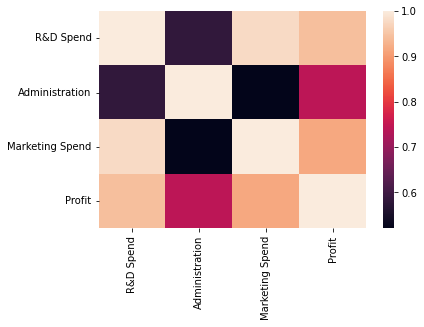

In [56]:
sns.heatmap(df.corr())

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [64]:
#predicting the test results 
y_pred = regressor.predict(x_test) 
print(y_pred)

[ 89622.46069768  87842.55305133  94735.06117603 176669.56121367
  82643.61914814 111801.04848311 135056.04016297  91291.96495689
 164327.16255757  53578.79149001  67114.01180909 149332.22993219
 126799.36640531  59503.74112216 178551.49249542  75156.70007111
 119168.05794539 164036.1750327  169263.4776569  182827.56076681
 118357.65723564  84917.85182228 181382.63623904  83394.8008045
 105648.55391736 101088.48645933  53554.17695967  57066.32262254
  68892.81229204 210493.2846231  121351.19723223 112888.21436112
 101799.384907   136816.46605786  63772.95973932 109998.89011469
 186892.91523247 172159.01876306 175834.76272556 118605.02954019
  96669.07630986 165209.84494094 108881.02173089  50622.53667706
 117477.19284194  58806.36394422 157283.95676596  78167.71608145
 158880.2539345  131153.37591566 185343.19106033 175739.21942814
  93934.57177399  78030.58398762 181064.38579122  83618.88558653
 142509.35441412 171358.33084026  83443.88431267 106136.192684
 141185.0907116   52993.3991

In [65]:
#calculating coefficients 
print(regressor.coef_)

[ 4.98273370e+02 -3.40908467e+02 -1.57364903e+02  8.09467976e+01
  8.55211932e-01  1.19052449e-01]


In [66]:
print(regressor.intercept_)

-52854.18042065957


In [67]:
#Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.9114714505439145